# SARIMA Model 
It's an extension of the ARIMA model that explicitly accounts for seasonality in time series data.

Key Components of SARIMA:

- Autoregressive (AR) Part: This component models the relationship between the current value and past values of the time series.
- Integrated (I) Part: This component involves differencing the time series to make it stationary.
- Moving Average (MA) Part: This component models the relationship between the current value and past errors.
- Seasonal Autoregressive (SAR) Part: This component models the relationship between the current value and past seasonal values.
- Seasonal Difference (SD) Part: This component involves differencing the time series to remove seasonal patterns.
- Seasonal Moving Average (SMA) Part: This component models the relationship between the current value and past seasonal errors.

SARIMA Model Specification:

A SARIMA model is typically denoted as SARIMA (p, d, q) (P, D, Q) s, where:

- `p`: Order of the AR term
- `d`: Order of differencing
- `q`: Order of the MA term
- `P`: Order of the seasonal AR term
- `D`: Order of the seasonal difference
- `Q`: Order of the seasonal MA term
- `s`: Period of seasonality

When to Use SARIMA:
•	When the time series exhibits clear seasonal patterns.
•	When the time series is non-stationary and requires differencing to become stationary.
•	When the underlying process generating the time series is linear.


### Add Project directory to system path

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

### Load Module

In [2]:
from script.SARIMA_model import Modelling
modelling=Modelling()

### Load Stoke Price Data

In [3]:
stoke_data=modelling.load_data("data/stoke_data.csv")

## **Modelling For Tesla(TSLA) Stock Price**

### **Train-Test Split**

In [4]:
train,test=modelling.train_test_split(stoke_data,'TSLA')

2024-11-12 08:10:05,040 - INFO - Train-Test split is done with a ratio of 0.8.


### **Grid Search P,Q and D parameters**
Similar to ARIMA models, we can use grid search to determine the optimal parameters for SARIMA models. We use p, q and d that we find from grid searching from the ARIMA model. In our case s=52 (the daily data is resampled to make weekly) since the seasonality is annual

In [5]:
best_params={'d': 1, 'p': 2, 'q': 3}
best_seasonal_params=modelling.grid_search(train,test,best_params)

2024-11-12 08:19:28,340 - INFO - Grid search is use to find the best seasonal orders of the SARIMA model.


Best seasonal parameters: {'D': 1, 'P': 0, 'Q': 1} with MAE: 31.96195266480856
Best overall SARIMA model parameters: (p, d, q): {'d': 1, 'p': 2, 'q': 3}, (P, D, Q, s): {'D': 1, 'P': 0, 'Q': 1}


### **Train with SARIMA model**

In [ ]:
forecast=modelling.sarima_train(train,test,best_params,best_seasonal_params)

2024-11-12 08:23:20,189 - INFO - The best orders are used to fit the SARIMA model.


### **Evaluate**

In [8]:
modelling.evaluate_sarima_model(test,forecast)

2024-11-12 08:24:27,256 - INFO - Evaluatio Metrics to assses the performance of the model.


Mean Absolute Error (MAE): 31.96195266480856
Mean Squared Error (MSE): 1729.3387420838224
Root Mean Squared Error (RMSE): 41.58531882869028
R Square Score (r2_score): -0.16815214947628343
Mean Absolute Percentage Error (MAPE): 16.305795934434382 %


**Interpretation**
- **High Error Metrics**: The high values of MAE, MSE, RMSE, and MAPE indicate that the SARIMA model struggles to accurately predict TSLA's stock price.
- **Negative R-squared**: The negative R-squared value suggests that the model's predictions are worse than a simple mean forecast.

**Conclusion:**

The SARIMA model for TSLA is not performing well. This could be due to the high volatility and non-linear patterns in Tesla's stock price, which may not be fully captured by the SARIMA model.

### **Plot Result**

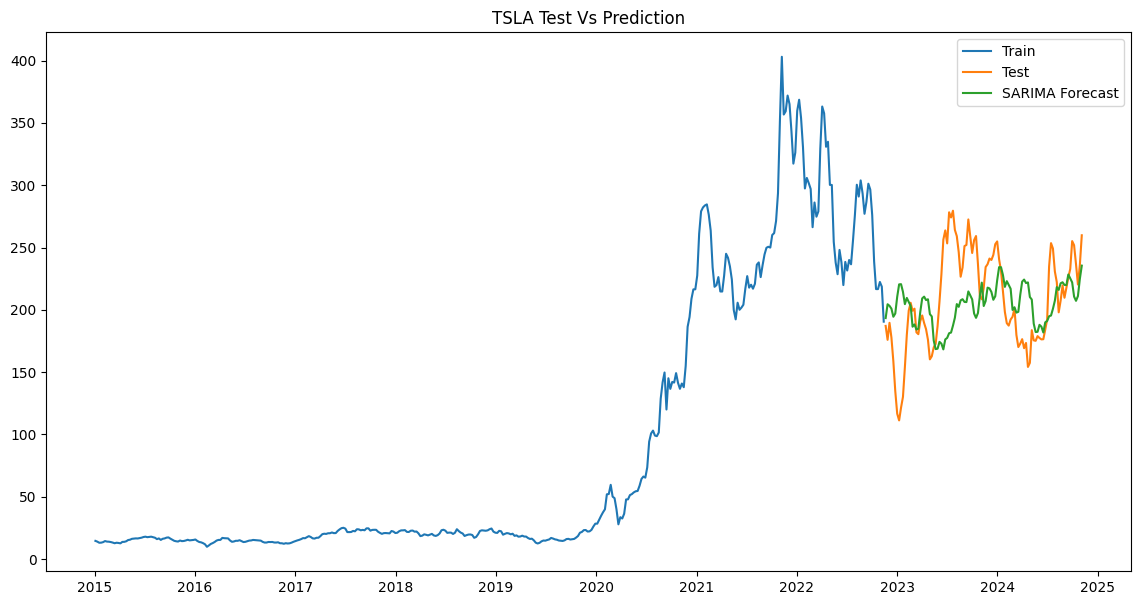

2024-11-12 08:24:40,320 - INFO - Plot of the resulting prediction.


In [9]:
modelling.plot_result('TSLA',train,test,forecast)

## **Modelling For Vanguard Total Bond Market ETF (BND) Stock Price**

### **Train-Test Split**

In [4]:
train,test=modelling.train_test_split(stoke_data,'BND')

2024-11-12 08:37:00,701 - INFO - Train-Test split is done with a ratio of 0.8.


### **Grid Search P,Q and D parameters**
The non-seasonal parameters (p,d and q) are used from the grid search used in the ARIMA model earlier.

In [5]:
best_params={'d': 1, 'p': 4, 'q': 4}
best_seasonal_params=modelling.grid_search(train,test,best_params)

2024-11-12 08:49:11,258 - INFO - Grid search is use to find the best seasonal orders of the SARIMA model.


Best seasonal parameters: {'D': 0, 'P': 0, 'Q': 0} with MAE: 5.516899195497285
Best overall SARIMA model parameters: (p, d, q): {'d': 1, 'p': 4, 'q': 4}, (P, D, Q, s): {'D': 0, 'P': 0, 'Q': 0}


### **Train with SARIMA model**

In [6]:
forecast=modelling.sarima_train(train,test,best_params,best_seasonal_params)

2024-11-12 08:50:31,148 - INFO - The best orders are used to fit the SARIMA model.


### **Evaluate**

In [7]:
modelling.evaluate_sarima_model(test,forecast)

2024-11-12 08:50:42,753 - INFO - Evaluatio Metrics to assses the performance of the model.


Mean Absolute Error (MAE): 5.516899195497285
Mean Squared Error (MSE): 33.90573712315797
Root Mean Squared Error (RMSE): 5.8228633096748865
R Square Score (r2_score): -15.697120400242206
Mean Absolute Percentage Error (MAPE): 7.58101573678375 %


**Interpretation**
- **Low Error Metrics**: The low values of MAE, MSE, RMSE, and MAPE suggest that the SARIMA model is performing well in predicting BND's stock price.
- **Negative R-squared**: While the R-squared value is negative, the low error metrics indicate that the model's predictions are still better than a simple mean forecast.

**Conclusion:**

The SARIMA model for BND seems to be performing reasonably well, especially considering the relatively stable nature of bond ETFs.

### **Plot Result**

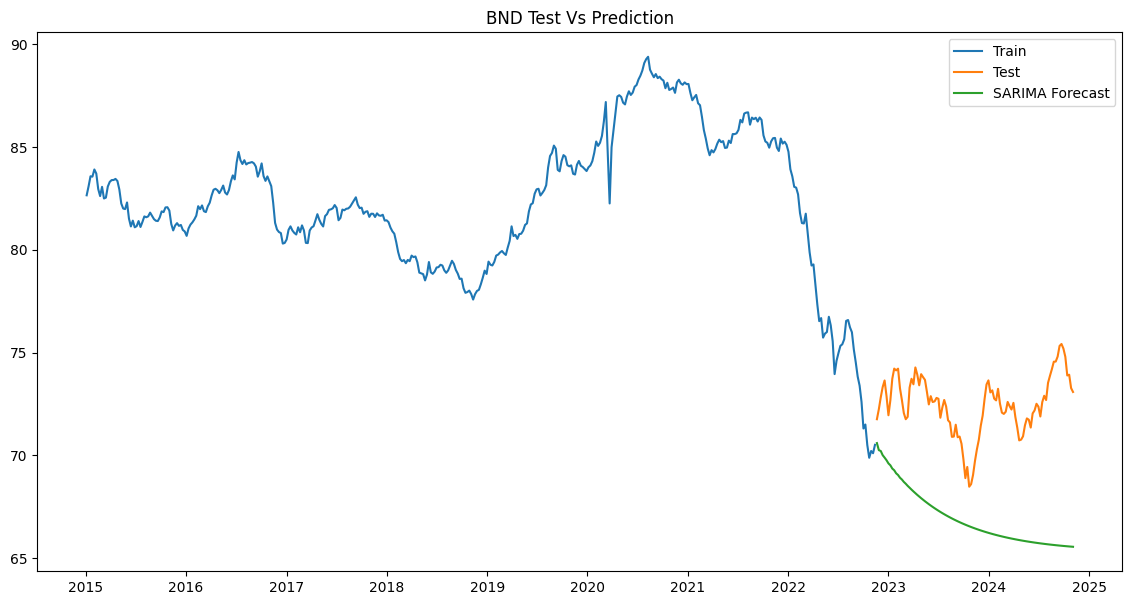

2024-11-12 08:50:56,923 - INFO - Plot of the resulting prediction.


In [8]:
modelling.plot_result('BND',train,test,forecast)

## **Modelling For S&P 500 ETF (SPY) Stock Price**

### **Train-Test Split**

In [9]:
train,test=modelling.train_test_split(stoke_data,'SPY')

2024-11-12 08:52:30,231 - INFO - Train-Test split is done with a ratio of 0.8.


### **Grid Search P,Q and D parameters**
The non-seasonal parameters (p,d and q) are used from the grid search used in the ARIMA model earlier.

In [10]:
best_params={'d': 1, 'p': 4, 'q': 4}
best_seasonal_params=modelling.grid_search(train,test,best_params)

2024-11-12 09:01:13,322 - INFO - Grid search is use to find the best seasonal orders of the SARIMA model.


Best seasonal parameters: {'D': 1, 'P': 1, 'Q': 1} with MAE: 56.1400317900559
Best overall SARIMA model parameters: (p, d, q): {'d': 1, 'p': 4, 'q': 4}, (P, D, Q, s): {'D': 1, 'P': 1, 'Q': 1}


### **Train with SARIMA model**

In [11]:
forecast=modelling.sarima_train(train,test,best_params,best_seasonal_params)

2024-11-12 09:13:26,442 - INFO - The best orders are used to fit the SARIMA model.


### **Evaluate**

In [12]:
modelling.evaluate_sarima_model(test,forecast)

2024-11-12 09:17:02,714 - INFO - Evaluatio Metrics to assses the performance of the model.


Mean Absolute Error (MAE): 56.1400317900559
Mean Squared Error (MSE): 5768.9608019067255
Root Mean Squared Error (RMSE): 75.9536753679947
R Square Score (r2_score): -0.6232118533738755
Mean Absolute Percentage Error (MAPE): 10.869382366662835 %


**Interpretation**
- **High Error Metrics**: The high values of MAE, MSE, RMSE, and MAPE indicate that the SARIMA model struggles to accurately predict SPY's stock price.
- **Negative R-squared**: The negative R-squared value suggests that the model's predictions are worse than a simple mean forecast.

**Conclusion:**

The SARIMA model for SPY is not performing well. This could be due to the complex dynamics of the stock market and the influence of various economic and geopolitical factors.

### **Plot Result**

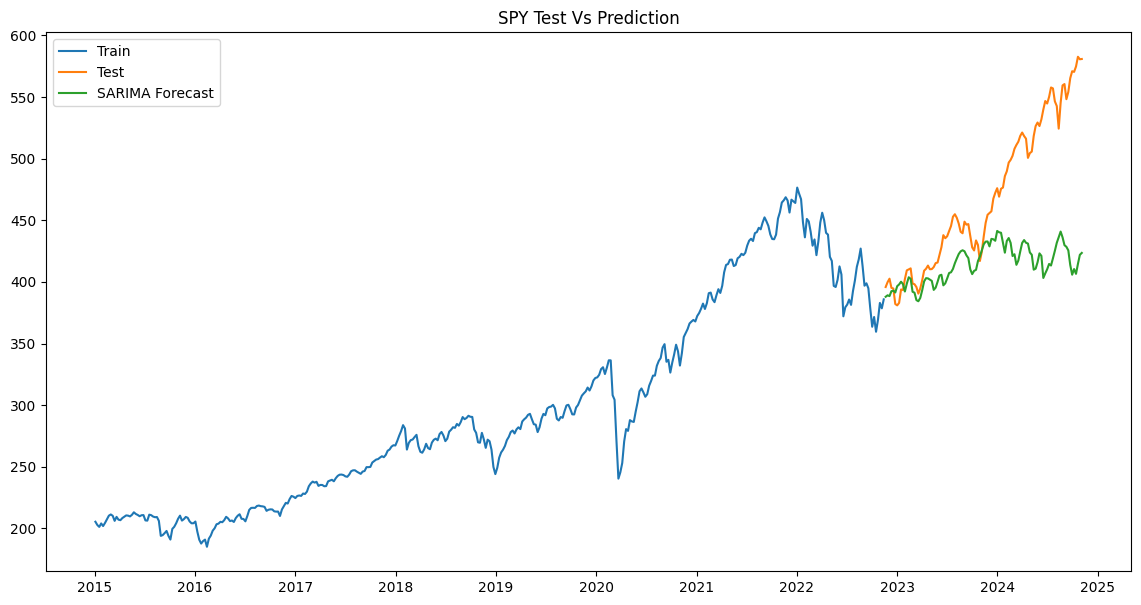

2024-11-12 09:17:09,641 - INFO - Plot of the resulting prediction.


In [13]:
modelling.plot_result('SPY',train,test,forecast)